In [1]:

!pip install plotly

!pip install cufflinks

!pip install chart_studio

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import cufflinks as cf
import plotly.offline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cf.go_offline()

1. Generar un DataFrame con los datos de los fichero:

2. Filtrar las columnas del DataFrame para quedarse con las columnas 'Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Borough'

3. Añade una nueva columna llamada 'Year' al DataFrame, que contenga solo el año de la fecha en que se creó la queja (basado en la columna 'Created Date').

4. Añadir una columna con la duración de la queja (desde la creación hasta la fecha de cierre).

5. Eliminar las filas con duraciones de quejas no válidas y ordenar el DataFrame por 'Borough' y 'Complaint Duration'

6. Mostrar por pantalla los distritos y los tipos de quejas disponibles en el DataFrame.

7. Crear una función que reciba un distrito, un tipo de queja y devuelva la duración promedio de ese tipo de queja en el distrito dado.

8. Mostrar un resumen descriptivo (mínimo, máximo, media, etc.) para cada tipo de queja.

9. Mostrar un resumen descriptivo para cada tipo de queja por distritos.

10. Crear una función que reciba un distrito y devuelva un resumen descriptivo de las duraciones de quejas de ese distrito.

11. Crear una función que devuelva las duraciones promedio de quejas mensuales de un distrito dado para todos los tipos de quejas.

12. Crear una función que reciba un tipo de queja y devuelva un DataFrame con las duraciones promedio de quejas mensuales de los distintos distritos.

13. ¿Cuál es la duración media de las quejas de todos los tipos de quejas para el distrito "MANHATTAN"?

14. ¿Cómo es la distribución de las quejas en cada distrito?

15. ¿Cuál es el número total de quejas en cada mes?

16. ¿Cuál es el tipo de queja más común?

17. ¿Cuál es la duración media de las quejas por tipo de queja?


In [3]:
# Generar un DataFrame con los datos de los fichero:

nyc = pd.read_csv(r"C:\Users\apico\Downloads\311_Service_Requests__2019-04-01_.csv")
nyc = pd.DataFrame(nyc)
nyc.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,42108723,04/01/2019 08:00:16 AM,04/01/2019 08:59:56 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11373.0,51-06 HILLYER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.736906,-73.885645,"(40.73690600974706, -73.88564459165903)"
1,42104638,04/01/2019 08:00:19 AM,05/10/2019 07:19:18 PM,DOT,Department of Transportation,Highway Condition,Graffiti - Highway,Highway,NaN,NaN,...,NaN,NaN,NaN,Clearview Expwy,North/Bronx Bound,Roadway,35th Ave (Exit 6A) - Willets Point Blvd (Exit 7),NaN,NaN,NaN
2,42107348,04/01/2019 08:00:45 AM,04/02/2019 08:48:15 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11232.0,4024 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.650530,-74.004685,"(40.65052993939405, -74.00468491123993)"
3,42112707,04/01/2019 08:01:00 AM,04/05/2019 12:00:00 PM,DSNY,Department of Sanitation,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11215.0,494 5 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.667561,-73.987661,"(40.66756073325308, -73.98766111858107)"
4,42112239,04/01/2019 08:01:18 AM,04/03/2019 02:10:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10468.0,2645 MORRIS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.866495,-73.896749,"(40.8664950875277, -73.89674905894428)"


2-Filtrar las columnas del DataFrame para quedarse con las columnas 'Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Borough'

In [4]:

nyc1 = nyc.loc[:,['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type', 'Borough']]
nyc1

,Unique Key,Created Date,Closed Date,Complaint Type,Borough
0,42108723,04/01/2019 08:00:16 AM,04/01/2019 08:59:56 AM,Blocked Driveway,QUEENS
1,42104638,04/01/2019 08:00:19 AM,05/10/2019 07:19:18 PM,Highway Condition,Unspecified
2,42107348,04/01/2019 08:00:45 AM,04/02/2019 08:48:15 PM,HEAT/HOT WATER,BROOKLYN
3,42112707,04/01/2019 08:01:00 AM,04/05/2019 12:00:00 PM,Sanitation Condition,BROOKLYN
4,42112239,04/01/2019 08:01:18 AM,04/03/2019 02:10:00 AM,HEAT/HOT WATER,BRONX
...,...,...,...,...,...
5964,42107379,04/01/2019 07:59:09 PM,04/04/2019 02:09:57 AM,HEAT/HOT WATER,BRONX
5965,42110686,04/01/2019 07:59:11 PM,04/01/2019 11:59:49 PM,Noise - Residential,MANHATTAN
5966,42112169,04/01/2019 07:59:15 PM,06/06/2019 05:19:05 PM,For Hire Vehicle Complaint,MANHATTAN
5967,42111932,04/01/2019 07:59:17 PM,04/01/2019 11:46:35 PM,Derelict Vehicle,BROOKLYN


3-Añade una nueva columna llamada 'Year' al DataFrame, que contenga solo el año de la fecha en que se creó la queja (basado en la columna 'Created Date').

In [5]:
nyc1['Created Date'] = pd.to_datetime(nyc1['Created Date'])
nyc1['Year'] = nyc1['Created Date'].dt.strftime('%Y')
nyc1

,Unique Key,Created Date,Closed Date,Complaint Type,Borough,Year
0,42108723,2019-04-01 08:00:16,04/01/2019 08:59:56 AM,Blocked Driveway,QUEENS,2019
1,42104638,2019-04-01 08:00:19,05/10/2019 07:19:18 PM,Highway Condition,Unspecified,2019
2,42107348,2019-04-01 08:00:45,04/02/2019 08:48:15 PM,HEAT/HOT WATER,BROOKLYN,2019
3,42112707,2019-04-01 08:01:00,04/05/2019 12:00:00 PM,Sanitation Condition,BROOKLYN,2019
4,42112239,2019-04-01 08:01:18,04/03/2019 02:10:00 AM,HEAT/HOT WATER,BRONX,2019
...,...,...,...,...,...,...
5964,42107379,2019-04-01 19:59:09,04/04/2019 02:09:57 AM,HEAT/HOT WATER,BRONX,2019
5965,42110686,2019-04-01 19:59:11,04/01/2019 11:59:49 PM,Noise - Residential,MANHATTAN,2019
5966,42112169,2019-04-01 19:59:15,06/06/2019 05:19:05 PM,For Hire Vehicle Complaint,MANHATTAN,2019
5967,42111932,2019-04-01 19:59:17,04/01/2019 11:46:35 PM,Derelict Vehicle,BROOKLYN,2019


4-Añadir una columna con la duración de la queja (desde la creación hasta la fecha de cierre).

In [6]:
nyc1['Closed Date'] = pd.to_datetime(nyc1['Closed Date'])
nyc1['Complaint Duration'] = (nyc1['Closed Date']-nyc1['Created Date'])
nyc1

,Unique Key,Created Date,Closed Date,Complaint Type,Borough,Year,Complaint Duration
0,42108723,2019-04-01 08:00:16,2019-04-01 08:59:56,Blocked Driveway,QUEENS,2019,0 days 00:59:40
1,42104638,2019-04-01 08:00:19,2019-05-10 19:19:18,Highway Condition,Unspecified,2019,39 days 11:18:59
2,42107348,2019-04-01 08:00:45,2019-04-02 20:48:15,HEAT/HOT WATER,BROOKLYN,2019,1 days 12:47:30
3,42112707,2019-04-01 08:01:00,2019-04-05 12:00:00,Sanitation Condition,BROOKLYN,2019,4 days 03:59:00
4,42112239,2019-04-01 08:01:18,2019-04-03 02:10:00,HEAT/HOT WATER,BRONX,2019,1 days 18:08:42
...,...,...,...,...,...,...,...
5964,42107379,2019-04-01 19:59:09,2019-04-04 02:09:57,HEAT/HOT WATER,BRONX,2019,2 days 06:10:48
5965,42110686,2019-04-01 19:59:11,2019-04-01 23:59:49,Noise - Residential,MANHATTAN,2019,0 days 04:00:38
5966,42112169,2019-04-01 19:59:15,2019-06-06 17:19:05,For Hire Vehicle Complaint,MANHATTAN,2019,65 days 21:19:50
5967,42111932,2019-04-01 19:59:17,2019-04-01 23:46:35,Derelict Vehicle,BROOKLYN,2019,0 days 03:47:18


5-Eliminar las filas con duraciones de quejas no válidas y ordenar el DataFrame por 'Borough' y 'Complaint Duration'

In [7]:
# Creamos una nueva columna resumiendo el total de las quejas, para así poder manipularla mejor
nyc1['Complaint Duration in Seconds'] = nyc1[:]['Complaint Duration'].astype('timedelta64[s]')

# Ordenamos de menor a mayor para comprobar si hay valores negativos
nyc2 = nyc1.sort_values('Complaint Duration in Seconds')

# Filtramos y eliminamos esos valores menores de cero y los NaN
condicion = nyc2['Complaint Duration in Seconds'] <= 0
df_filtrado = nyc2.drop(nyc2[condicion].index)
df_filtrado2 = df_filtrado.dropna(subset=['Complaint Duration in Seconds'])

# Ordenamos la tabla segun especificaciones y eliminamos la columna extra que hemos añadido
df_ordenado = df_filtrado2.sort_values(['Borough', 'Complaint Duration'])
nyc3 = df_ordenado.drop('Complaint Duration in Seconds', axis=1)

nyc3


,Unique Key,Created Date,Closed Date,Complaint Type,Borough,Year,Complaint Duration
2772,42104452,2019-04-01 12:33:34,2019-04-01 12:45:40,Advocate-Prop Refunds/Credits,BRONX,2019,0 days 00:12:06
1993,42106346,2019-04-01 11:20:00,2019-04-01 11:34:00,Traffic Signal Condition,BRONX,2019,0 days 00:14:00
2743,42104085,2019-04-01 12:29:01,2019-04-01 12:56:20,Illegal Parking,BRONX,2019,0 days 00:27:19
3544,42107548,2019-04-01 13:49:35,2019-04-01 14:20:50,Blocked Driveway,BRONX,2019,0 days 00:31:15
2006,42110310,2019-04-01 11:21:43,2019-04-01 11:59:35,Asbestos,BRONX,2019,0 days 00:37:52
...,...,...,...,...,...,...,...
4726,42109695,2019-04-01 16:13:35,2019-07-17 10:12:00,For Hire Vehicle Complaint,Unspecified,2019,106 days 17:58:25
3815,42112021,2019-04-01 14:19:54,2019-07-22 14:18:00,For Hire Vehicle Complaint,Unspecified,2019,111 days 23:58:06
2407,42105127,2019-04-01 12:00:00,2019-04-02 12:00:00,Derelict Vehicles,NaN,2019,1 days 00:00:00
2465,42112927,2019-04-01 12:00:00,2019-04-02 12:00:00,Derelict Vehicles,NaN,2019,1 days 00:00:00


6-Mostrar por pantalla los distritos y los tipos de quejas disponibles en el DataFrame.

In [8]:
print(nyc3['Borough'].unique())
print('\n')
print(nyc3['Complaint Type'].unique())

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND' 'Unspecified' nan]


['Advocate-Prop Refunds/Credits' 'Traffic Signal Condition'
 'Illegal Parking' 'Blocked Driveway' 'Asbestos' 'Sewer'
 'Request Large Bulky Item Collection' 'Noise - Residential'
 'Water System' 'Drug Activity' 'Water Conservation' 'Hazardous Materials'
 'Sanitation Condition' 'Indoor Air Quality' 'HEAT/HOT WATER'
 'Animal Abuse' 'Street Condition' 'Noise - Street/Sidewalk'
 'Derelict Vehicle' 'DOF Property - Property Value' 'Vending'
 'DOF Property - Update Account' 'Elevator' 'Building/Use'
 'DOF Property - Payment Issue' 'Noise' 'Noise - Vehicle' 'Graffiti'
 'Traffic' 'Broken Parking Meter' 'Street Light Condition' 'Lead'
 'Dirty Conditions' 'Consumer Complaint' 'Root/Sewer/Sidewalk Condition'
 'Damaged Tree' 'Dead/Dying Tree' 'Missed Collection (All Materials)'
 'UNSANITARY CONDITION' 'PAINT/PLASTER' 'Derelict Vehicles' 'Air Quality'
 'Overflowing Litter Baskets' 'WATER LEAK' 'PLUMBING'
 'Street Sign - Dam

7-Crear una función que reciba un distrito, un tipo de queja y devuelva la duración promedio de ese tipo de queja en el distrito dado.

In [9]:
distrito = 'BRONX'
tipo_queja = 'Illegal Parking'

def duracion_queja(distrito,tipo_queja):
    
    # Filtramos los valores dados en las columnas correspondientes
    filtro_distrito = nyc3[nyc3['Borough'].isin([distrito])] 
    filtro_tipo_queja = nyc3[nyc3['Complaint Type'].isin([tipo_queja])]
    
    # Comprobamos los elementos en común entre DISTRITO Y TIPO DE QUEJA
    filtro_distrito_queja = filtro_distrito.merge(filtro_tipo_queja)
    
    # Filtramos solo la columna DURACION DE LA QUEJA  y le calculamos el promedio
    
    return filtro_distrito_queja['Complaint Duration'].mean()


# Aplicamos la función e imprimimos

duracion_promedio = duracion_queja(distrito,tipo_queja)

print(f"La duración promedio es {duracion_promedio}")
    
    

La duración promedio es 0 days 10:32:26.926829268


8-Mostrar un resumen descriptivo (mínimo, máximo, media, etc.) para cada tipo de queja.

In [10]:
# Filtramos las columnas que vamos a utilizar

nyc4 = nyc3[['Complaint Type','Complaint Duration']]

# Agrupamos por contaminante y aplicamos el resumen descriptivo al valor

resumen_descriptivo = nyc4.groupby('Complaint Type')['Complaint Duration'].describe()

resumen_descriptivo


,count,mean,std,min,25%,50%,75%,max
Complaint Type,,,,,,,,
APPLIANCE,28,14 days 02:22:25.535714285,9 days 01:11:50.653169220,2 days 17:33:00,6 days 11:09:48,13 days 16:14:50.500000,19 days 02:38:37,31 days 00:58:40
Advocate-Prop Refunds/Credits,2,0 days 00:10:05.500000,0 days 00:02:50.412734265,0 days 00:08:05,0 days 00:09:05.250000,0 days 00:10:05.500000,0 days 00:11:05.750000,0 days 00:12:06
Air Quality,29,2 days 12:25:24.827586206,2 days 09:04:08.701115747,0 days 12:12:00,1 days 01:20:00,1 days 16:16:00,2 days 03:24:00,8 days 18:52:00
Animal Abuse,10,0 days 09:43:38.200000,0 days 11:24:47.100694878,0 days 01:07:01,0 days 02:12:54.500000,0 days 05:00:26.500000,0 days 10:54:18.750000,1 days 06:41:28
Animal in a Park,4,23 days 08:58:31,24 days 03:31:01.351874368,0 days 03:14:04,6 days 00:37:37.750000,20 days 00:23:12,37 days 08:44:05.250000,53 days 07:53:36
...,...,...,...,...,...,...,...,...
Violation of Park Rules,3,0 days 00:28:58.333333333,0 days 00:27:14.212144531,0 days 00:00:05,0 days 00:16:22,0 days 00:32:39,0 days 00:43:25,0 days 00:54:11
WATER LEAK,92,14 days 06:32:43.782608695,17 days 23:13:54.874483284,1 days 01:41:37,4 days 01:40:14,9 days 14:21:17,16 days 18:21:03.250000,99 days 20:11:21
Water Conservation,11,0 days 09:19:10.909090909,0 days 09:14:22.052087790,0 days 00:35:00,0 days 01:08:00,0 days 07:53:00,0 days 14:06:00,1 days 04:46:00


9-Mostrar un resumen descriptivo para cada tipo de queja por distritos.

In [11]:
# Filtramos las columnas que vamos a utilizar

nyc5 = nyc3[['Borough','Complaint Type','Complaint Duration']]

# Agrupamos por distrito y aplicamos el resumen descriptivo la duración de la queja

resumen_descriptivo = nyc5.groupby(['Borough','Complaint Type'])['Complaint Duration'].describe()

resumen_descriptivo

count                        mean  \
Borough     Complaint Type                                                    
BRONX       APPLIANCE                        14  18 days 02:54:10.714285714   
            Advocate-Prop Refunds/Credits     1             0 days 00:12:06   
            Air Quality                       4             1 days 09:36:45   
            Animal Abuse                      3   0 days 21:03:23.666666666   
            Asbestos                          1             0 days 00:37:52   
...                                         ...                         ...   
Unspecified Street Sign - Missing             1             0 days 01:08:20   
            Taxi Complaint                    1            11 days 02:20:56   
            Taxi Report                       1             0 days 00:08:43   
            Traffic                           1             0 days 00:44:45   
            Violation of Park Rules           1             0 days 00:54:11   

                                                                  std  \
Borough     Complaint Type                                              
BRONX       APPLIANCE                      10 days 11:48:39.211562763   
            Advocate-Prop Refunds/Credits                         NaT   
            Air Quality                     0 days 08:55:27.310811831   
            Animal Abuse                    0 days 16:20:00.545782614   
            Asbestos                                              NaT   
...                                                               ...   
Unspecified Street Sign - Missing                                 NaT   
            Taxi Complaint                                        NaT   
            Taxi Report                                           NaT   
            Traffic                                               NaT   
            Violation of Park Rules                               NaT   

                                                        min  \
Borough     Complaint Type                                    
BRONX       APPLIANCE                       3 days 22:45:33   
            Advocate-Prop Refunds/Credits   0 days 00:12:06   
            Air Quality                     1 days 00:43:00   
            Animal Abuse                    0 days 02:11:52   
            Asbestos                        0 days 00:37:52   
...                                                     ...   
Unspecified Street Sign - Missing           0 days 01:08:20   
            Taxi Complaint                 11 days 02:20:56   
            Taxi Report                     0 days 00:08:43   
            Traffic                         0 days 00:44:45   
            Violation of Park Rules         0 days 00:54:11   

                                                              25%  \
Borough     Complaint Type                                          
BRONX       APPLIANCE                             7 days 21:07:23   
            Advocate-Prop Refunds/Credits         0 days 00:12:06   
            Air Quality                           1 days 02:35:30   
            Animal Abuse                   0 days 16:14:21.500000   
            Asbestos                              0 days 00:37:52   
...                                                           ...   
Unspecified Street Sign - Missing                 0 days 01:08:20   
            Taxi Complaint                       11 days 02:20:56   
            Taxi Report                           0 days 00:08:43   
            Traffic                               0 days 00:44:45   
            Violation of Park Rules               0 days 00:54:11   

                                                        50%  \
Borough     Complaint Type                                    
BRONX       APPLIANCE                      19 days 02:38:37   
            Advocate-Prop Refunds/Credits   0 days 00:12:06   
            Air Quality                     1 days 09:44:30   
            Animal Abuse       

10-Crear una función que reciba un distrito y devuelva un resumen descriptivo de las duraciones de quejas de ese distrito.

In [12]:
distrito = 'BRONX'

def duracion_segun_distrito(distrito):
    
    filtro_distrito = nyc3[nyc3['Borough'].isin([distrito])] 
    
    return filtro_distrito['Complaint Duration'].describe()

resumen_por_distrito = duracion_segun_distrito(distrito)

resumen_por_distrito


count                           867
mean     13 days 16:10:30.633217993
std      39 days 01:51:53.633042057
min                 0 days 00:12:06
25%                 1 days 02:08:10
50%                 3 days 23:29:03
75%         14 days 03:05:02.500000
max               630 days 05:31:00
Name: Complaint Duration, dtype: object

11-Crear una función que devuelva las duraciones promedio de quejas mensuales de un distrito dado para todos los tipos de quejas

In [13]:
distrito = 'BRONX'
# Creamos la columna del mes que nos va a servir para filtrar la busqueda
nyc1['Month'] = nyc1['Created Date'].dt.strftime('%m')

def duracion_promedio_por_mes (distrito):
    
    filtro_distrito = nyc1[nyc1['Borough'].isin([distrito])] 
    
    return filtro_distrito.groupby(['Month','Complaint Type'])['Complaint Duration'].mean()

duracion_segun_queja_por_mes = duracion_promedio_por_mes(distrito)

duracion_segun_queja_por_mes


Month  Complaint Type               
04     APPLIANCE                       18 days 02:54:10.714285714
       Advocate-Prop Refunds/Credits              0 days 00:12:06
       Air Quality                                1 days 09:36:45
       Animal Abuse                     0 days 21:03:23.666666666
       Asbestos                                   0 days 00:37:52
                                                  ...            
       Vacant Lot                                 1 days 13:17:00
       Vending                             0 days 06:20:27.500000
       WATER LEAK                      20 days 08:17:02.666666666
       Water Conservation                         0 days 04:32:00
       Water System                               3 days 05:32:30
Name: Complaint Duration, Length: 79, dtype: timedelta64[ns]

12-Crear una función que reciba un tipo de queja y devuelva un DataFrame con las duraciones promedio de quejas mensuales de los distintos distritos.

In [14]:
tipo_queja = 'Illegal Parking'

def duracion_promedio_segun_queja(tipo_queja):
    
    filtro_tipo_queja = nyc1[nyc1['Complaint Type'].isin([tipo_queja])]
    
    return filtro_tipo_queja.groupby(['Borough','Month','Complaint Type'])['Complaint Duration'].mean()
    
resumen_promedio = duracion_promedio_segun_queja(tipo_queja)

resumen_promedio

Borough        Month  Complaint Type 
BRONX          04     Illegal Parking   0 days 10:32:26.926829268
BROOKLYN       04     Illegal Parking      0 days 04:58:15.687500
MANHATTAN      04     Illegal Parking   0 days 03:21:44.619718309
QUEENS         04     Illegal Parking   0 days 04:34:37.556603773
STATEN ISLAND  04     Illegal Parking      0 days 04:02:54.125000
Name: Complaint Duration, dtype: timedelta64[ns]

13-¿Cuál es la duración media de las quejas de todos los tipos de quejas para el distrito "MANHATTAN"?

In [15]:

distrito = 'MANHATTAN'

def duracion_segun_distrito(distrito):
    
    filtro_distrito = nyc3[nyc3['Borough'].isin([distrito])] 
    
    return filtro_distrito.groupby('Complaint Type')['Complaint Duration'].mean()

resumen_por_distrito = duracion_segun_distrito(distrito)

resumen_por_distrito


Complaint Type
APPLIANCE                          12 days 01:03:34
Air Quality               3 days 11:19:26.666666666
Animal Abuse              0 days 04:10:46.666666666
Animal in a Park                    7 days 23:45:29
Asbestos                     2 days 13:05:06.250000
                                     ...           
Vending                             0 days 01:28:39
Violation of Park Rules             0 days 00:16:22
WATER LEAK                   9 days 21:05:34.750000
Water Quality                       1 days 05:39:00
Water System              2 days 16:55:55.384615384
Name: Complaint Duration, Length: 99, dtype: timedelta64[ns]

14-¿Cómo es la distribución de las quejas en cada distrito?

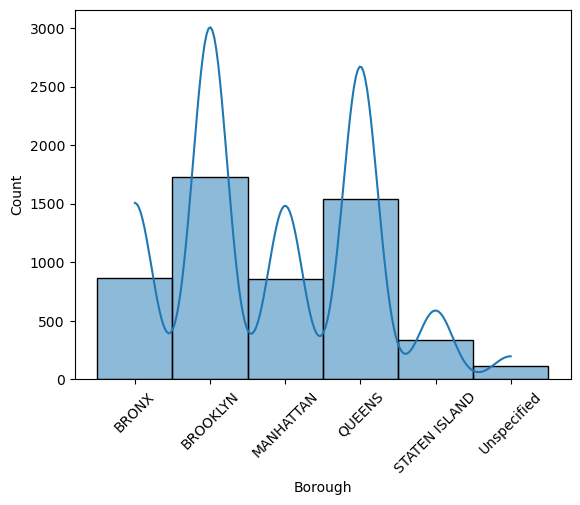

In [44]:
sns.histplot(nyc3['Borough'], kde=True)
plt.xticks(rotation=45)
plt.show()


15-¿Cuál es el número total de quejas en cada mes?

In [53]:
nyc1.groupby('Month')['Complaint Type'].count()

Month
04    5969
Name: Complaint Type, dtype: int64

16-¿Cuál es el tipo de queja más común?

In [65]:
queja_mas_comun = nyc1.groupby('Complaint Type')['Complaint Type'].count()

queja_mas_comun2 = queja_mas_comun.sort_values(ascending=False)

queja_mas_comun2.head(1)

Complaint Type
Request Large Bulky Item Collection    586
Name: Complaint Type, dtype: int64

17-¿Cuál es la duración media de las quejas por tipo de queja?

In [66]:
nyc1.groupby('Complaint Type')['Complaint Duration'].mean()

Complaint Type
APPLIANCE                       14 days 02:22:25.535714285
Advocate-Prop Refunds/Credits       0 days 00:10:05.500000
Air Quality                      2 days 12:25:24.827586206
Animal Abuse                        0 days 09:43:38.200000
Animal in a Park                          23 days 08:58:31
                                           ...            
Violation of Park Rules          0 days 00:28:58.333333333
WATER LEAK                      14 days 06:32:43.782608695
Water Conservation               0 days 09:19:10.909090909
Water Quality                             13 days 01:21:00
Water System                               4 days 02:32:00
Name: Complaint Duration, Length: 139, dtype: timedelta64[ns]